In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import seaborn as sns


In [2]:
df = pd.read_csv("/dataset/nifty_500_quarterly_results new.csv")
df

,name,NSE_code,BSE_code,sector,industry,revenue,operating_expenses,operating_profit,operating_profit_margin,depreciation,interest,profit_before_tax,tax,net_profit,EPS,profit_TTM,EPS_TTM
0,3M India Ltd.,3MINDIA,523395,GENERAL INDUSTRIALS,INDUSTRIAL MACHINERY,"1,057",847.4,192.1,18.48%,12.9,0.7,195.9,49.8,146.1,129.7,535.9,475.7
1,ACC Ltd.,ACC,500410,CEMENT AND CONSTRUCTION,CEMENT & CEMENT PRODUCTS,"4,644.8","3,885.4",549.3,12.39%,212.8,28.9,517.7,131.5,387.9,20.7,"1,202.7",64.0
2,AIA Engineering Ltd.,AIAENG,532683,GENERAL INDUSTRIALS,OTHER INDUSTRIAL GOODS,"1,357.1",912.7,382.1,29.51%,24.5,7.4,412.5,88.4,323.1,34.3,"1,216.1",128.9
3,APL Apollo Tubes Ltd.,APLAPOLLO,533758,METALS & MINING,IRON & STEEL PRODUCTS,"4,65","4,305.4",325,7.02%,41.3,26.6,276.7,73.8,202.9,7.3,767.5,27.7
4,Au Small Finance Bank Ltd.,AUBANK,540611,BANKING AND FINANCE,BANKS,"2,956.5","1,026.7",647.7,25.59%,0,"1,282.1",533.4,131.5,401.8,6.0,"1,606.2",24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Allcargo Logistics Ltd.,ALLCARGO,532749,TRANSPORTATION,TRANSPORTATION - LOGISTICS,"3,336.3","3,188.8",118,3.57%,106.7,36.7,14.2,1.3,21.8,0.9,361.9,14.7
497,Sheela Foam Ltd.,SFL,540203,DIVERSIFIED CONSUMER SERVICES,FURNITURE-FURNISHING-PAINTS,637.6,547,66.2,10.80%,21.9,8.6,60.2,15.6,44,4.5,192.4,17.7
498,Alok Industries Ltd.,ALOKINDS,521070,TEXTILES APPARELS & ACCESSORIES,TEXTILES,"1,369.3","1,323.1",35.9,2.64%,78.6,142.2,-174.6,0,-174.8,-0.3,-948.4,-1.9
499,Minda Corporation Ltd.,MINDACORP,538962,AUTOMOBILES & AUTO COMPONENTS,AUTO PARTS & EQUIPMENT,"1,197.9","1,064.5",131.3,10.98%,41.4,14.9,77,18.7,58.8,2.5,278.2,11.6


In [3]:
df.info()
df_size = df.shape

# The result is a tuple (number_of_rows, number_of_columns)
print("Number of rows:", df_size[0])
print("Number of columns:", df_size[1])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     501 non-null    object 
 1   NSE_code                 501 non-null    object 
 2   BSE_code                 501 non-null    object 
 3   sector                   501 non-null    object 
 4   industry                 501 non-null    object 
 5   revenue                  500 non-null    object 
 6   operating_expenses       500 non-null    object 
 7   operating_profit         500 non-null    object 
 8   operating_profit_margin  500 non-null    object 
 9   depreciation             500 non-null    object 
 10  interest                 500 non-null    object 
 11  profit_before_tax        500 non-null    object 
 12  tax                      500 non-null    object 
 13  net_profit               500 non-null    object 
 14  EPS                      5

In [4]:
#changing object datatypes to numeric datatypes

change_variables = ["revenue", "operating_expenses", "operating_profit", "operating_profit_margin", "depreciation", "interest", "profit_before_tax", "tax", "net_profit", "profit_TTM"]

df[change_variables] = df[change_variables].apply(pd.to_numeric, errors="coerce")
# init_df[change_variables] = pd.to_numeric(init_df[change_variables], errors="ignore") #just another way to do it

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     501 non-null    object 
 1   NSE_code                 501 non-null    object 
 2   BSE_code                 501 non-null    object 
 3   sector                   501 non-null    object 
 4   industry                 501 non-null    object 
 5   revenue                  153 non-null    float64
 6   operating_expenses       216 non-null    float64
 7   operating_profit         387 non-null    float64
 8   operating_profit_margin  0 non-null      float64
 9   depreciation             476 non-null    float64
 10  interest                 442 non-null    float64
 11  profit_before_tax        415 non-null    float64
 12  tax                      464 non-null    float64
 13  net_profit               430 non-null    float64
 14  EPS                      5

In [5]:
#checking null data
df.isnull().sum()

name                         0
NSE_code                     0
BSE_code                     0
sector                       0
industry                     0
revenue                    348
operating_expenses         285
operating_profit           114
operating_profit_margin    501
depreciation                25
interest                    59
profit_before_tax           86
tax                         37
net_profit                  71
EPS                          1
profit_TTM                 201
EPS_TTM                      3
dtype: int64

In [6]:
#removing NA values
df.dropna()

df.count()


name                       501
NSE_code                   501
BSE_code                   501
sector                     501
industry                   501
revenue                    153
operating_expenses         216
operating_profit           387
operating_profit_margin      0
depreciation               476
interest                   442
profit_before_tax          415
tax                        464
net_profit                 430
EPS                        500
profit_TTM                 300
EPS_TTM                    498
dtype: int64

In [7]:
#checking duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
496    False
497    False
498    False
499    False
500    False
Length: 501, dtype: bool

In [8]:
#treating outliers

def remove_outliers(df, column_name):
    # Calculating the IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Defining the limits to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = ((df[column_name] < lower_bound) | (df[column_name] > upper_bound)).sum()

    df[column_name] = df[column_name].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return df, outlier_count

Text(0.5, 1.0, 'Revenue histogram with the kde line')

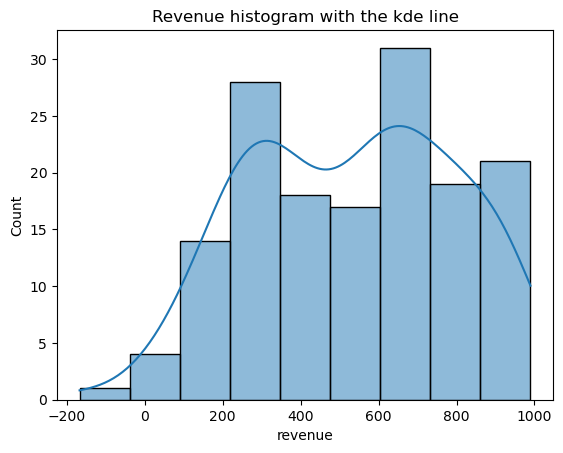

In [9]:
df_num = df.select_dtypes(include='float64')
df_treat, oc = remove_outliers(df_num, 'revenue')
sns.histplot(df_treat['revenue'], kde=True)
plt.title('Revenue histogram with the kde line')
# print(oc)

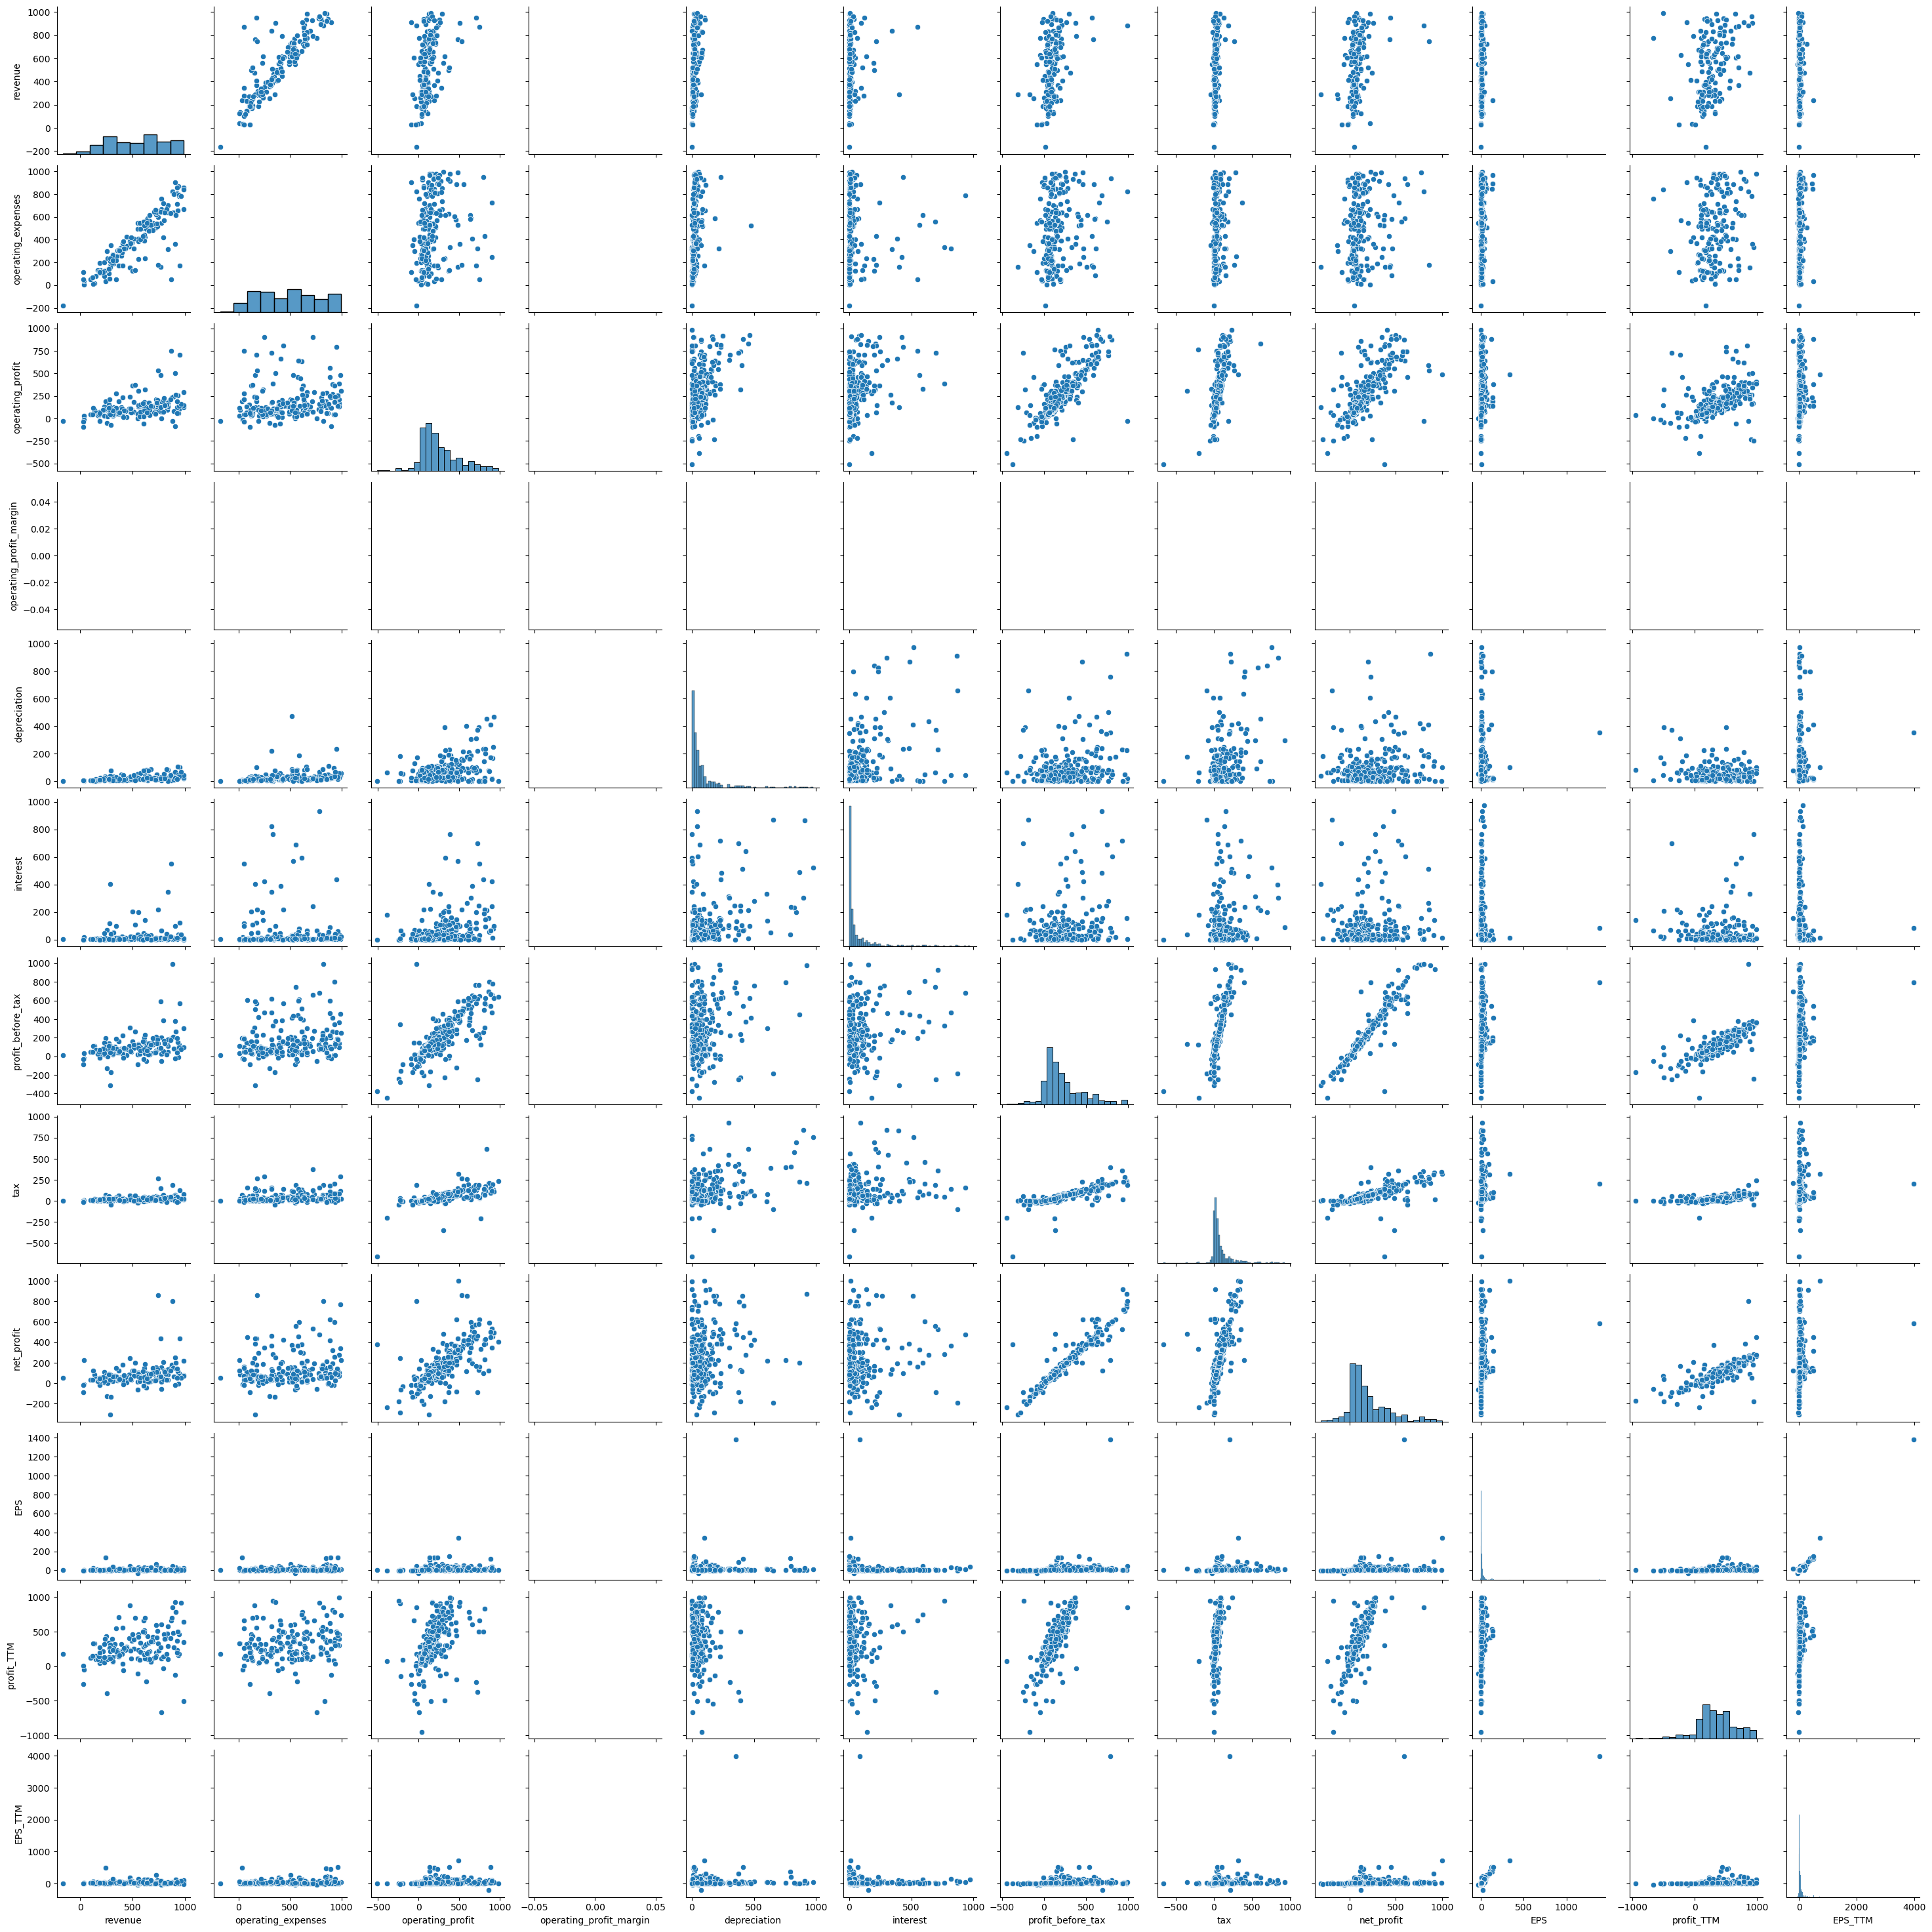

In [10]:
sns.pairplot(df)
plt.show()

# tried to do it without using seaborn
# scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='hist')
# plt.show()

# apart from this cell, i have only used matplotlib since throughtout the semester we have focused on matplotlib
# so this is the best place to showcase the prowess over the matplotlib library

<Axes: >

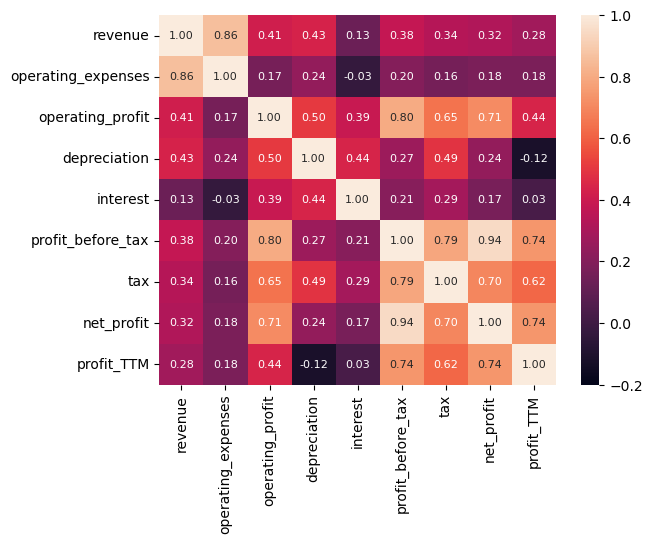

In [11]:
num_cols = ["revenue", "operating_expenses", "operating_profit", "depreciation", "interest", "profit_before_tax", "tax", "net_profit", "profit_TTM"]
corrmat = df[num_cols].corr()


sns.heatmap(data=corrmat, annot=True, annot_kws={'size': 8}, vmax= 1, vmin= -0.2, fmt = '.2f')

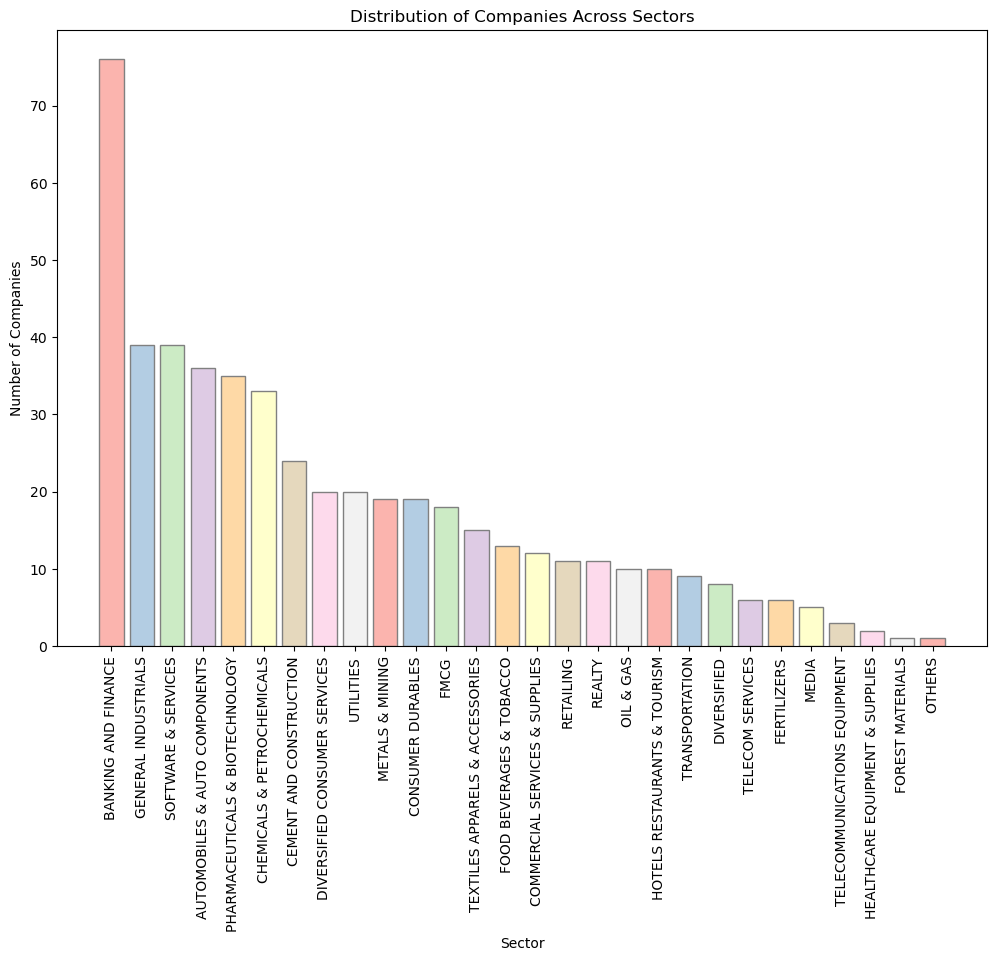

In [12]:
#distribution of companies across sectors

plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('Pastel1')
sector_counts = df['sector'].value_counts()

bar_colors = []
for i in range(len(sector_counts)):
    color = cmap(i % cmap.N)
    bar_colors.append(color)

plt.bar(sector_counts.index, sector_counts, color=bar_colors, edgecolor='gray')
plt.title('Distribution of Companies Across Sectors')
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.xticks(rotation=90)
plt.show()

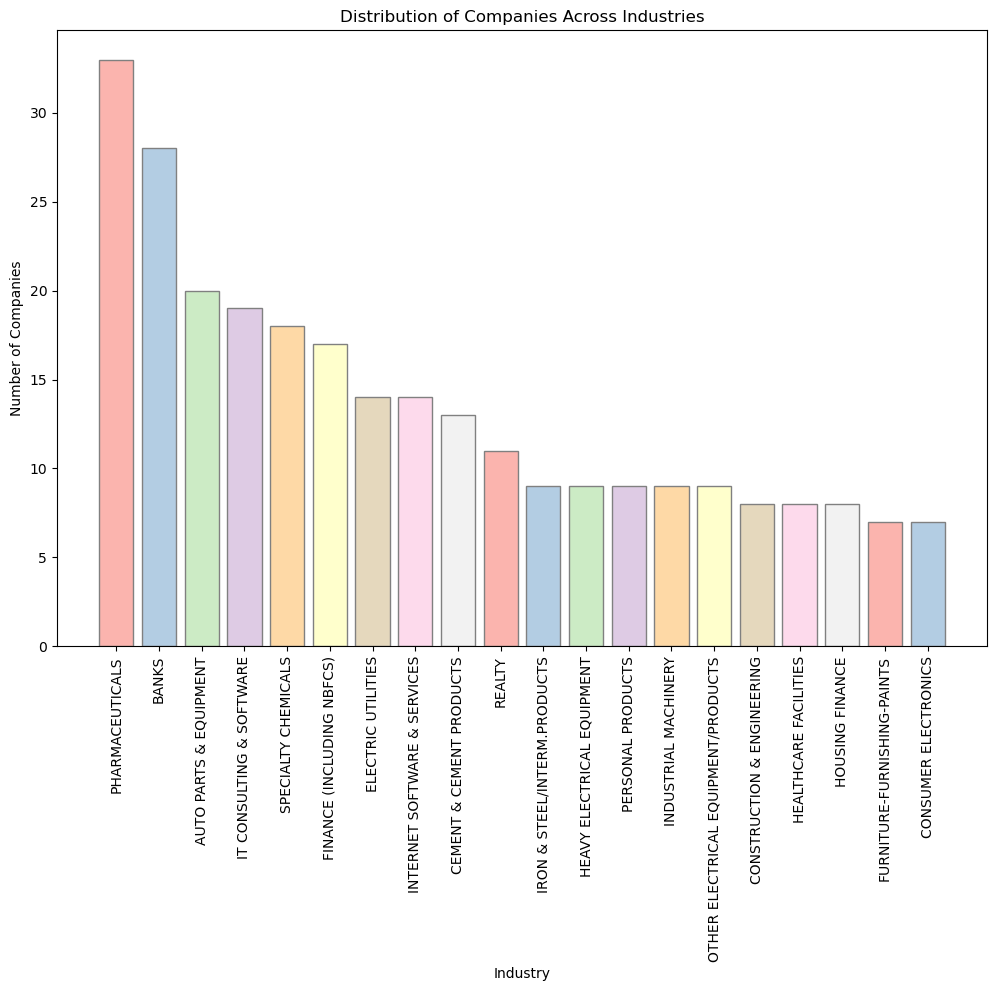

In [13]:
#distribution of companies across industries - top 20

plt.figure(figsize=(12, 8))
# Count the occurrences of each industry in the DataFrame (head(30) for top 30)
industry_counts = df['industry'].value_counts().head(20)


cmap = plt.get_cmap('Pastel1')
bar_colors = []
for i in range(len(industry_counts)):
    color = cmap(i % cmap.N)
    bar_colors.append(color)

# Create a bar plot with specified colors and edge color
plt.bar(industry_counts.index, industry_counts, color = bar_colors, edgecolor='gray')

# Add title and labels to the plot
plt.title('Distribution of Companies Across Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')

# Customize x-axis ticks for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


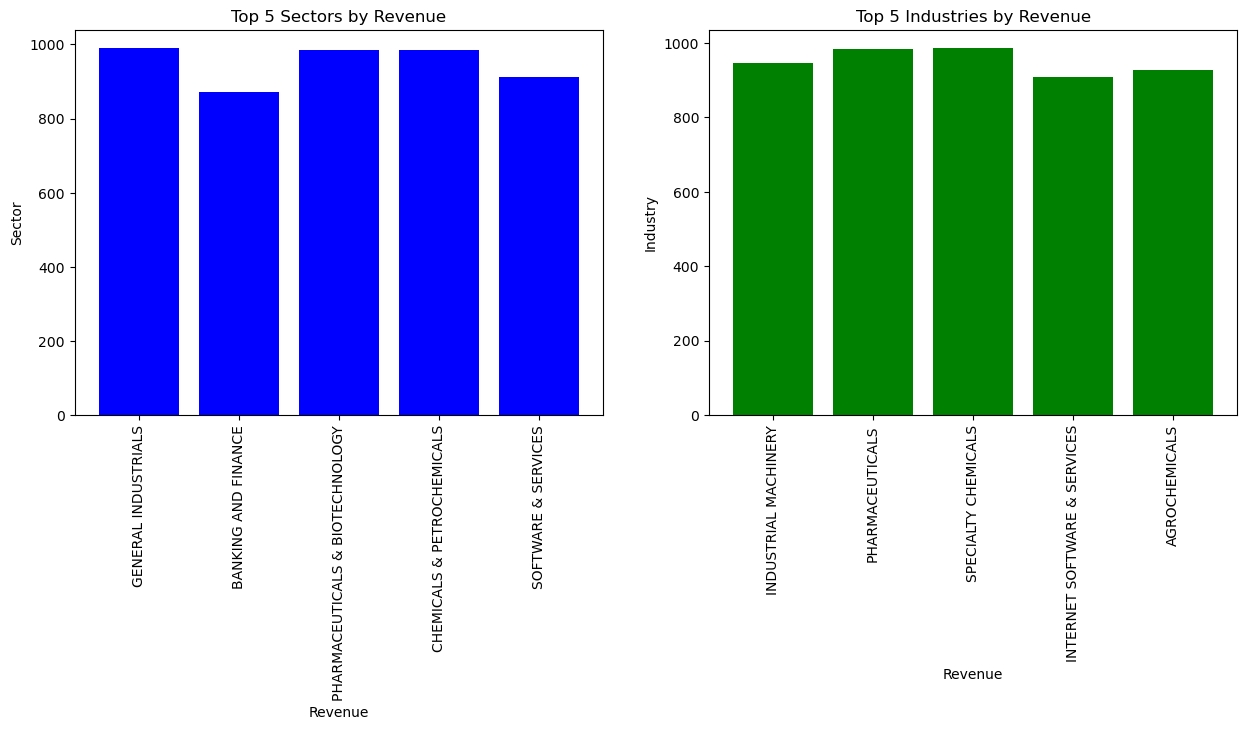

In [14]:
#5 Largest by revenue 

df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

top5_sectors = df.groupby('sector')['revenue'].sum().nlargest(5).index
df_top5_sectors = df[df['sector'].isin(top5_sectors)]

# Top 5 industries by revenue
top5_industries = df.groupby('industry')['revenue'].sum().nlargest(5).index
df_top5_industries = df[df['industry'].isin(top5_industries)]

# Create subplots
plt.figure(figsize=(15, 5))

# Plot for top 5 sectors by revenue
plt.subplot(1, 2, 1)
plt.bar(df_top5_sectors['sector'], df_top5_sectors['revenue'], color='blue')
plt.title('Top 5 Sectors by Revenue')
plt.xlabel('Revenue')
plt.xticks(rotation = 90)
plt.ylabel('Sector')

# Plot for top 5 industries by revenue
plt.subplot(1, 2, 2)
plt.bar(df_top5_industries['industry'], df_top5_industries['revenue'], color='green')
plt.title('Top 5 Industries by Revenue')
plt.xlabel('Revenue')
plt.xticks(rotation = 90)
plt.ylabel('Industry')

plt.show()

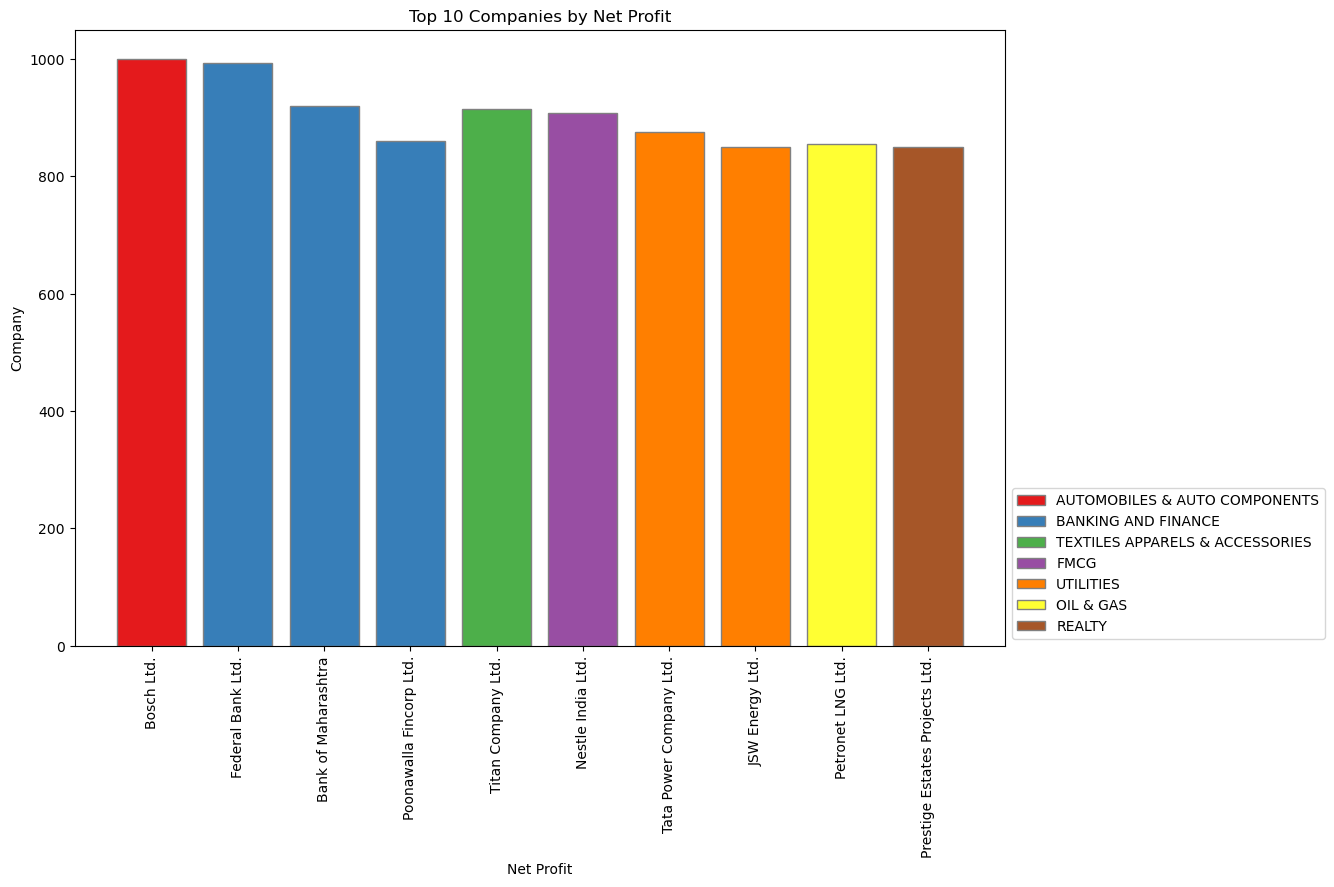

In [15]:
#top 10 companies by net profit
top10_df = df.nlargest(10, 'net_profit')

# Create a bar plot using matplotlib
plt.figure(figsize=(12, 8))
legend_labels = []

# Plot bars for each sector
for sector, bar_colors in zip(top10_df['sector'].unique(), plt.cm.Set1.colors):
    sector_data = top10_df[top10_df['sector'] == sector]
    plt.bar(sector_data['name'], sector_data['net_profit'], color = bar_colors, edgecolor = "gray")
    legend_labels.append(sector)


# Set labels and title
plt.xlabel('Net Profit')
plt.ylabel('Company')
plt.xticks(rotation = 90)
plt.title('Top 10 Companies by Net Profit')
plt.legend(legend_labels, bbox_to_anchor=(1, 0), loc='lower left')
plt.show()

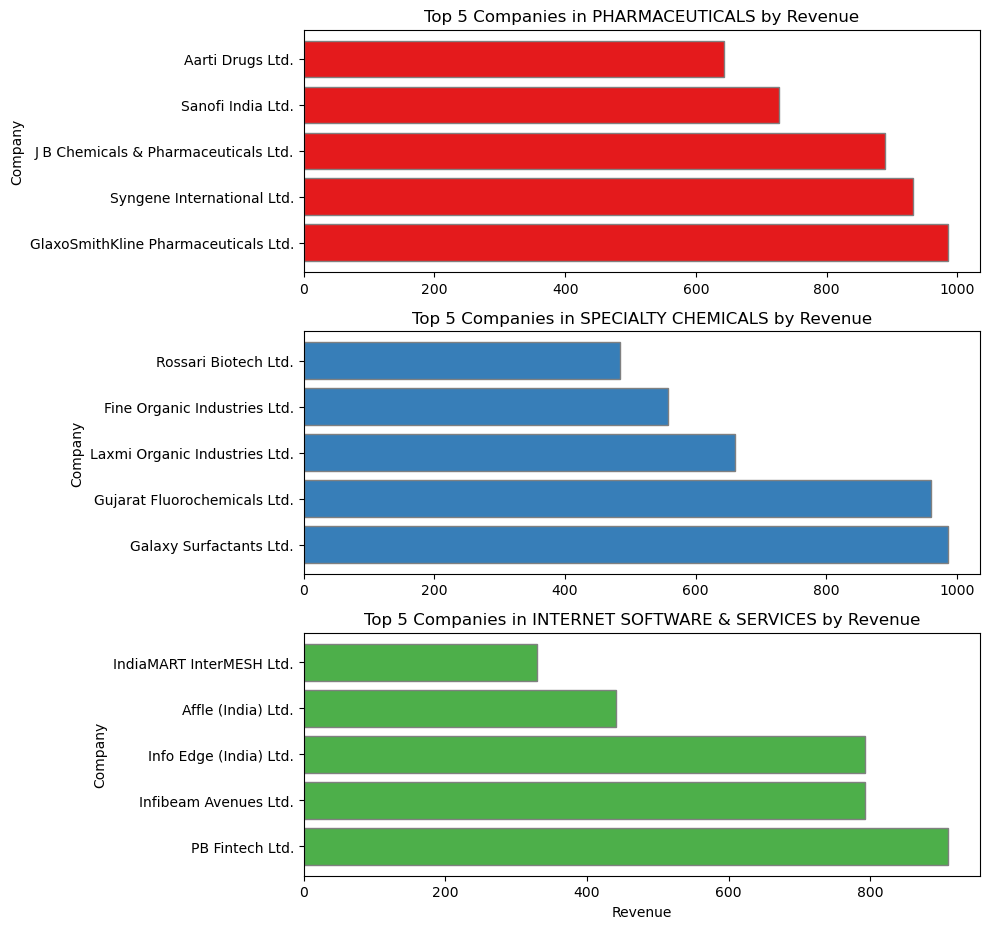

In [16]:
top3_industries = df.groupby('industry')['revenue'].sum().nlargest(3).index

# Create subplots
plt.figure(figsize=(10, 15))

# Iterate over top 5 industries
for i, (industry, bar_colors) in enumerate(zip(top3_industries, plt.cm.Set1.colors), 1):
    # Select the top 5 companies in each industry
    top5_companies = df[df['industry'] == industry].nlargest(5, 'revenue')
    
    # Plot horizontal bar chart
    plt.subplot(5, 1, i)
    plt.barh(top5_companies['name'], top5_companies['revenue'], color = bar_colors, edgecolor = 'gray')
    
    # Set labels and title for each subplot
    plt.ylabel('Company')
    plt.title(f'Top 5 Companies in {industry} by Revenue')

# Set x-axis label for the last subplot
plt.xlabel('Revenue')

# Adjust layout
plt.tight_layout()
plt.show()

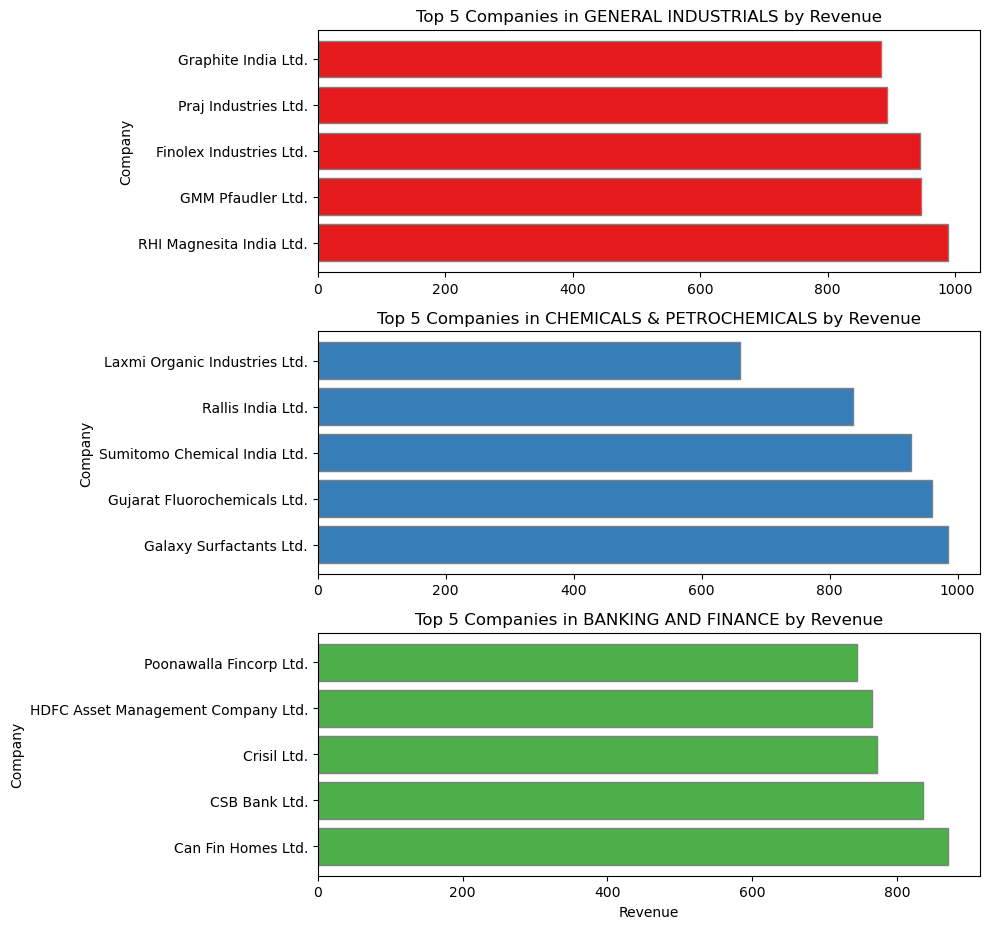

In [17]:
top3_sector = df.groupby('sector')['revenue'].sum().nlargest(3).index

# Create subplots
plt.figure(figsize=(10, 15))

# Iterate over top 3 industries
for i, (sector, bar_colors) in enumerate(zip(top3_sector, plt.cm.Set1.colors), 1):
    # Select the top 5 companies in each industry
    top5_companies = df[df['sector'] == sector].nlargest(5, 'revenue')
    
    # Plot horizontal bar chart
    plt.subplot(5, 1, i)
    plt.barh(top5_companies['name'], top5_companies['revenue'], color = bar_colors, edgecolor = 'gray')
    
    # Set labels and title for each subplot
    plt.ylabel('Company')
    plt.title(f'Top 5 Companies in {sector} by Revenue')

# Set x-axis label for the last subplot
plt.xlabel('Revenue')

# Adjust layout
plt.tight_layout()
plt.show()